# 1.Conociendo los datos
Este apartado explica el tipo de datos con los que se ha realizado el estudio.

Principalmente nos encontramos con 7 columnas de datos numéricos (year, suicides_no, population, suicides/100k pop, HDI for year, gdp_per_capita y gdp_for _year), de las cuales únicamente hay que tratar gdp_for_year ya que utiliza comas en lugar de puntos como separador. Las 5 columnas restantes contienen valores categóricos que han de ser convertidos.
Cada fila del dataset, por lo tanto, tiene :
* Country: una celda donde dice el país que hace referencia la fila.
* Year: año donde se situa la fila(),
* Sex: el sexo del grupo de personas que han cometido el suicidio.
* Age: rango de edad de las personas
* Suicides_no: el numero de suicidios de ese año().
* Population: población del país en ese año en concreto.
* Suicides/100k pop: la proporción de estos suicidios respecto a 100.000 habitantes del país.
* Country-year: celda que dice país y año junto.
* HDI for year: índice que refleja el desarrollo humano en el país. Tiene en cuenta esperanza de vida, educación e indicadores de ingreso per cápita.
* GDP_for_year: producto interior bruto del país, calculado anualmente, en dólares.
* Gdp_per_capita: producto interior bruto por persona. Es el resultado de dividir el gdp_for_year entre la suma de la población de cada rango de edad en un mismo año. 
* Generation: la generación a la que pertenecen según el año en que nacieron. Cada generación tiene unos hechos históricos y características adjudicados.

Las filas están separadas según el rango de edad y el sexo, por lo tanto el año de cada país se repite un total de 12 veces porque hay 6 rangos de edad y 2 sexos contemplados.


In [68]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from scipy import stats
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('suicide_rate.csv')
dataset.rename(columns={"gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(dataset.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita', 'generation'],
      dtype='object')


# 2.Pre-processing
En el dataset hay 12 columnas, de  las cuales vamos a utilizar 10. La razón explicada por partes es: 
-	Country-year es eliminada ya que esta columna es una combinación de las columnas country y year, que ya las tenemos por separado. Por lo tanto, la elimino para no tener una columna adicional que me aporte la misma información.
-	HDI for year nos aporta información que podría ser interesante, pero debido a la multitud de filas vacías, 19.456 de 27.820, he decidido eliminarla y no tenerla en cuenta.


In [69]:
dataset.drop(['HDI for year', 'country-year'], axis=1, inplace= True)
data = dataset.values

print(dataset.isnull().sum())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita        0
generation            0
dtype: int64


In [70]:
#Tractament de gdp_for_year
import re
gdp=[]
for num in data[:,7]:
    transformed=re.sub(",","", num)
    gdp.append(int(transformed))
gdp = np.array(gdp)
df = pd.DataFrame(gdp, columns=['gdp'])

Del resto de columnas hay que tratar 5. Comienzo por la columna gdp_for_year. En esta columna la única acción requerida es la eliminación de la coma en la puntuación de los miles del número, para que no sea interpretado como un string y pueda leerse como para lo que fue escrito, un int.

Vamos a ver un grafico de comparativo entre sexos en función de los años.

Debido a que country tiene muchos valores únicos y nos podría causar múltiples problemas, sobre todo a nivel de performance, se utiliza un label encoder para proceder a la transformación de esta columna.

In [71]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_categorical = dataset[['sex', 'country', 'generation', 'age']]
#Sex encoding
sex_reshaped = np.array(df_categorical['sex']).reshape(-1, 1)
sex_values = ohe.fit_transform(sex_reshaped)
sex = pd.DataFrame(sex_values.toarray(), columns=['Female', 'Male'])
#Generation encoding
gen_reshaped = np.array(df_categorical['generation']).reshape(-1, 1)
gen_values = ohe.fit_transform(gen_reshaped)
gen = pd.DataFrame(gen_values.toarray(), columns=['Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z'])
#Age encoding
age_reshaped = np.array(df_categorical['age']).reshape(-1, 1)
age_values = ohe.fit_transform(age_reshaped)
age = pd.DataFrame(age_values.toarray(), columns=['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'])

df = df.join(sex)
df = df.join(gen)
df = df.join(age)
df['Male'] = df[['Male']].astype(int)
df['Female'] = df[['Female']].astype(int)
df['Generation X'] = df[['Generation X']].astype(int)
df['Silent'] = df[['Silent']].astype(int)
df['G.I. Generation'] = df[['G.I. Generation']].astype(int)
df['Boomers'] = df[['Boomers']].astype(int)
df['Millenials'] = df[['Millenials']].astype(int)
df['Generation Z'] = df[['Generation Z']].astype(int)
df['15-24 years'] = df[['15-24 years']].astype(int)
df['35-54 years'] = df[['35-54 years']].astype(int)
df['75+ years'] = df[['75+ years']].astype(int)
df['25-34 years'] = df[['25-34 years']].astype(int)
df['55-74 years'] = df[['55-74 years']].astype(int)
df['5-14 years'] = df[['5-14 years']].astype(int)

df.head()

,gdp,Female,Male,Generation X,Silent,G.I. Generation,Boomers,Millenials,Generation Z,15-24 years,35-54 years,75+ years,25-34 years,55-74 years,5-14 years
0,2156624900,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,2156624900,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,2156624900,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2156624900,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,2156624900,0,1,1,0,0,0,0,0,0,1,0,0,0,0


In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Country encoding
le.fit(df_categorical['country'])
country_values = le.transform(df_categorical['country'])
country = pd.DataFrame(country_values, columns=['country'])
df = df.join(country)

df = df.join(dataset['year'])
df = df.join(dataset['suicides_no'])
df = df.join(dataset['population'])
df = df.join(dataset['suicides/100k pop'])
df = df.join(dataset['gdp_per_capita'])
df.describe()

,gdp,Female,Male,Generation X,Silent,G.I. Generation,Boomers,Millenials,Generation Z,15-24 years,...,75+ years,25-34 years,55-74 years,5-14 years,country,year,suicides_no,population,suicides/100k pop,gdp_per_capita
count,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,...,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000,27820.000
mean,445580969025.727,0.500,0.500,0.179,0.099,0.230,0.053,0.210,0.229,0.167,...,0.167,0.166,0.167,0.167,49.275,2001.258,242.574,1844793.617,12.816,16866.464
std,1453609985940.916,0.500,0.500,0.384,0.298,0.421,0.224,0.407,0.420,0.373,...,0.373,0.372,0.373,0.373,29.373,8.469,902.048,3911779.442,18.962,18887.576
min,46919625.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1985.000,0.000,278.000,0.000,251.000
25%,8985352832.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,24.000,1995.000,3.000,97498.500,0.920,3447.000
50%,48114688201.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,47.000,2002.000,25.000,430150.000,5.990,9372.000
75%,260202429150.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,74.000,2008.000,131.000,1486143.250,16.620,24874.000
max,18120714000000.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,100.000,2016.000,22338.000,43805214.000,224.970,126352.000


 Por otro lado, al tener pocos valores únicos en sex, age y generation, además de no ser valores ordinales, procedemos a utilizar one hot encoding para que la predicción quede más matizada.

# Decisión del modelo y estudio de los datos
Comenzamos mirando la correlación que existe entre los datos con un mapa de calor.

<IPython.core.display.Javascript object>


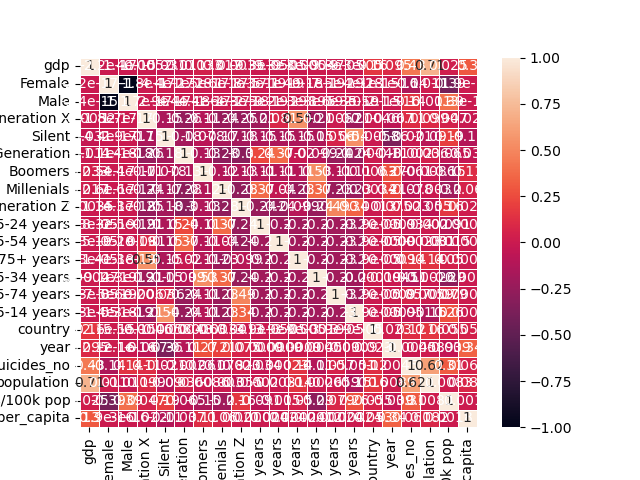

In [73]:
correlacio = df.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


Como podemos ver, no hay correlación entre los datos (a excepción de male y female). Donde parece haber correlación es entre gdp(gdp_for_year) y número de suicidios. 
En el resto de gràficos hemos visto, a parte que aún teniendo casos donde la edad y el sexo no afectan, hay otros en los que sí.

<AxesSubplot:xlabel='age', ylabel='suicides/100k pop'>

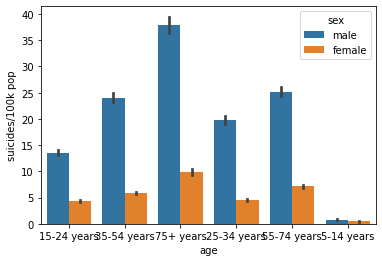

In [74]:
from IPython.display import display
%matplotlib inline
o1=sns.barplot(data=dataset, x='age', y='suicides/100k pop', hue='sex')
display(o1)

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

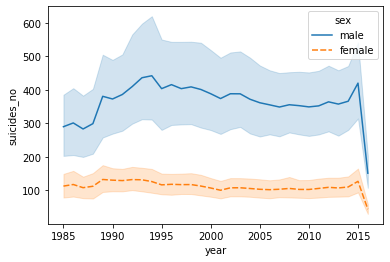

In [75]:
o2=sns.lineplot(data=dataset, x="year", y="suicides_no", hue="sex", style="sex")
display(o2)

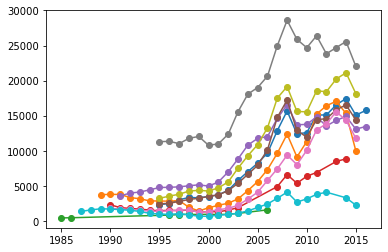

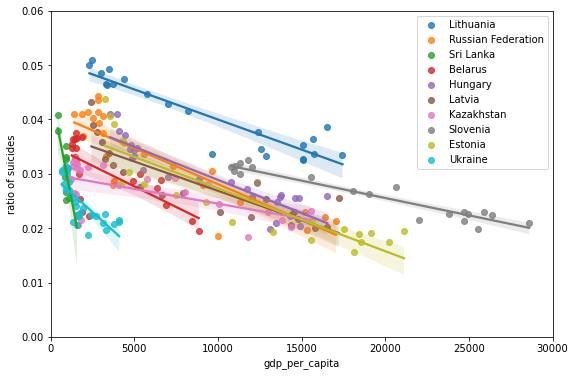

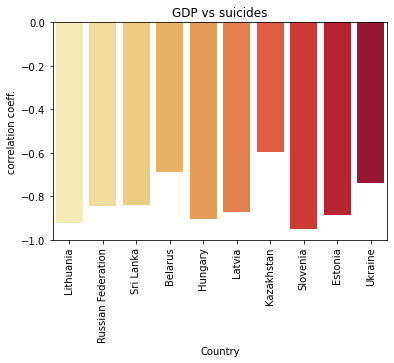

In [76]:
df_suino = dataset.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = dataset.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum

country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]
country_dict = dict()
for idx in range(len(country_list)):
    country_dict[country] = country_suicide[idx]
df_gdp = dataset.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.06)
plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

In [80]:
dataset['suicide_risk'] = 'low' 

dataset.loc[dataset['suicides/100k pop'] > dataset['suicides/100k pop'].mean(), 'suicide_risk'] = 'high' 
dataset['suicide_risk'].value_counts()

low     19061
high     8759
Name: suicide_risk, dtype: int64

In [82]:
print(df['suicides/100k pop'])
target_col = dataset['suicide_risk']
target_col_val = target_col.values
df.drop(['suicides/100k pop'],axis=1, inplace= True)


0       6.710
1       5.190
2       4.830
3       4.590
4       3.280
         ... 
27815   2.960
27816   2.580
27817   2.170
27818   1.670
27819   1.460
Name: suicides/100k pop, Length: 27820, dtype: float64


In [77]:
from sklearn import preprocessing
from sklearn import utils
input_col = df[['Male', 'Female', '15-24 years', '35-54 years', '75+ years',
              '25-34 years', '55-74 years', '5-14 years', 'gdp_per_capita', 
               'country']]

x = df.values
x = x[:, [0,1,2,9,10,11,12,13,14,15,16]]

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))
print(training_scores_encoded)

       Male  Female
0         1       0
1         1       0
2         0       1
3         1       0
4         1       0
...     ...     ...
27815     0       1
27816     0       1
27817     1       0
27818     0       1
27819     0       1

[27820 rows x 2 columns]


In [8]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split


# Creem el classificador SVM amb un kernel lineal
clf = svm.SVC(kernel='linear')


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

# Dividim el dataset en 50% entrenament i 50% test
x_train, x_test, y_train, y_test = train_test_split(x, training_scores_encoded, test_size=0.3, random_state=42)

# Creem el classificador SVM amb un kernel lineal
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(x_train, y_train)

#Mostrem la corba
display = PrecisionRecallDisplay.from_estimator(
    clf, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = clf.fit(x_train, y_train).decision_function(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE training'+rms_train.astype(str))
print('RMSE test'+rms_test.astype(str))